In [26]:
import numpy as np
import matplotlib.pyplot as plt
import random
from imgaug import augmenters as iaa
from imgaug import parameters as iap
from sklearn.model_selection import train_test_split
from livelossplot import PlotLossesKeras
from keras.models import Sequential
from keras.layers import Conv2D , Flatten, Dense,Dropout,MaxPooling2D,Lambda

In [2]:
cd Data

C:\Users\benia\Desktop\Machine_Learning\Korona wyzwań\Challenge 3\Data


In [3]:
X = np.load("X.npy")
y = np.load("y.npy")


In [4]:
print(X.shape, y.shape)

(3612, 60, 80, 3) (3612,)


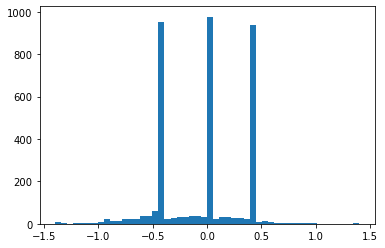

In [5]:
plt.hist(y,50);


0.0


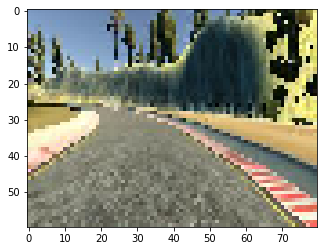

-0.16


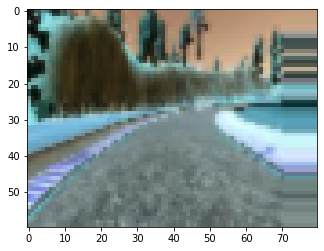

In [6]:
def augment(img,steering_angle):
  #Flip
  if random.random()>0.5:
    img=img[:,::-1,:]
    steering_angle = -steering_angle
  #Blur
  blurer = iaa.GaussianBlur(iap.Uniform(0.1, 2.0))
  img = blurer.augment_image(img)
  #Shuffle
  sh = iaa.ChannelShuffle(p=0.5)
  img=sh.augment_image(img)
  #Fog
  fog = iaa.Fog()
  fog.augment_image(img)
  #translate
  tx= random.randint(-20,20)
  translater = iaa.Affine(translate_px={"x":tx},mode = "edge")
  img = translater.augment_image(img)
  steering_angle += tx*0.02
  return img,steering_angle

plt.imshow(X[0])
print(y[0])
plt.show();
img,angle = augment(X[0],y[0])
plt.imshow(img)
print(angle)
plt.show();

In [7]:
X_train,X_val,y_train,y_val = train_test_split(X,y,test_size=0.2,random_state=42) 

In [8]:
print(X_train.shape,y_train.shape)
print(X_val.shape,y_val.shape)

(2889, 60, 80, 3) (2889,)
(723, 60, 80, 3) (723,)


In [9]:
Xgen=[]
ygen=[]
for i in range(1000):
  img,angle=augment(X[i],y[i])
  Xgen.append(img)
  ygen.append(angle)

Xgen= np.array(Xgen)
ygen= np.array(ygen)
print(Xgen.shape , ygen.shape)

(1000, 60, 80, 3) (1000,)


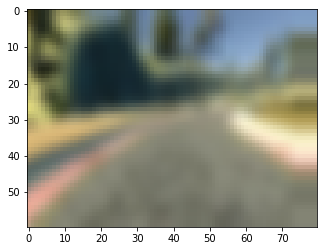

In [10]:
plt.imshow(Xgen[0])

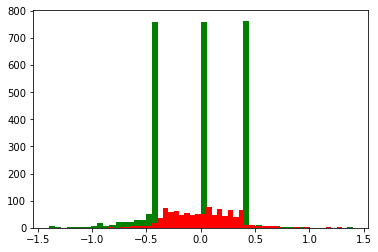

In [11]:
plt.hist(y_train,50,facecolor="green");
plt.hist(ygen,50,facecolor="red");

In [30]:
def myModel(input_shape):
    model = Sequential([
        Lambda(lambda x:(x-128.0)/255.0,input_shape=input_shape,name="normalize"),
        Conv2D(64,(3,3),activation='relu'),
        #MaxPooling2D(pool_size=(2,2)),
        Conv2D(32,(3,3),activation='relu'),
        MaxPooling2D(pool_size=(2,2)),
        Conv2D(16,(3,3),activation='relu'),
        MaxPooling2D(pool_size=(2,2)),
        Conv2D(8,(3,3),activation='relu'),
        MaxPooling2D(pool_size=(2,2)),
        Dropout(rate=0.5),
        Flatten(),
        Dense(512,activation='relu'),
        Dropout(rate=0.3),
        Dense(512,activation='relu'),
        Dropout(rate=0.3),
        Dense(16,activation='relu'),
        Dense(1)
        
        
    ])
    return model
model = myModel(X[0].shape)
model.summary()
model.compile('adam','mse')

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
normalize (Lambda)           (None, 60, 80, 3)         0         
_________________________________________________________________
conv2d_30 (Conv2D)           (None, 58, 78, 64)        1792      
_________________________________________________________________
conv2d_31 (Conv2D)           (None, 56, 76, 32)        18464     
_________________________________________________________________
max_pooling2d_22 (MaxPooling (None, 28, 38, 32)        0         
_________________________________________________________________
conv2d_32 (Conv2D)           (None, 26, 36, 16)        4624      
_________________________________________________________________
max_pooling2d_23 (MaxPooling (None, 13, 18, 16)        0         
_________________________________________________________________
conv2d_33 (Conv2D)           (None, 11, 16, 8)        

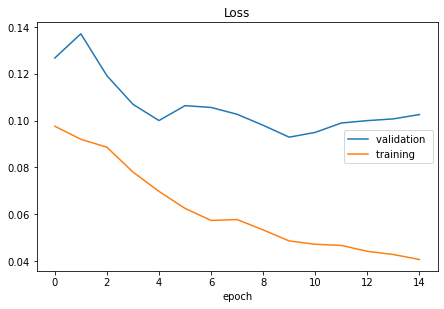

Loss
	validation       	 (min:    0.093, max:    0.137, cur:    0.103)
	training         	 (min:    0.041, max:    0.098, cur:    0.041)


In [27]:
batch_size = 512
epochs = 15

model.fit(Xgen,ygen,
         batch_size=batch_size,
         epochs=epochs,
         validation_data=(X_val,y_val),
         callbacks=[PlotLossesKeras()]
         
         )


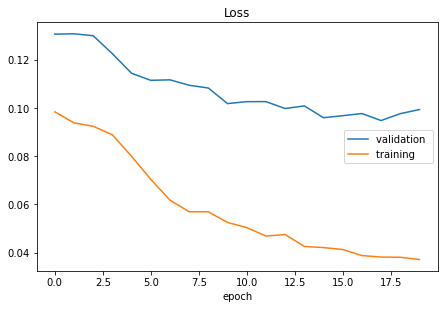

Loss
	validation       	 (min:    0.095, max:    0.131, cur:    0.099)
	training         	 (min:    0.037, max:    0.098, cur:    0.037)


In [31]:
batch_size = 512
epochs = 20

model.fit(Xgen,ygen,
         batch_size=batch_size,
         epochs=epochs,
         validation_data=(X_val,y_val),
         callbacks=[PlotLossesKeras()]
         
         )


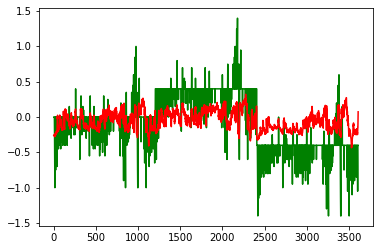

In [32]:
ypred = model.predict(X)
plt.plot(y,"g",ypred,"r")
plt.show();


In [33]:
model.save("mymodelday5.h5")

In [34]:
import autokeras as ak

ModuleNotFoundError: No module named 'autokeras'

In [ ]:
model_ak = ak.ImageRegressor(verbose=True)
model_ak.fit(Xgen,ygen,time_limit=5*60)


In [ ]:
score = model_ak.evaluate(X_val,y_val)
print(score)

In [ ]:
ypred = model_ak.predict(X)
